In [2]:
import torch
import torchvision

In [14]:
# transfer from PIL image to Tensor
trans = torchvision.transforms.ToTensor()

In [15]:
mnist_train = torchvision.datasets.FashionMNIST(root='FashionMNIST/raw/train-images-idx3-ubyte', train=True, transform=trans)
mnist_test = torchvision.datasets.FashionMNIST(root='FashionMNIST/raw/t10k-images-idx3-ubyte', train=False, transform=trans)

In [79]:
print(len(mnist_train), len(mnist_test))
# print(mnist_train[0])
# size[1, 28, 28]
print(mnist_train[0][0].shape)
print(type(mnist_train[0][0]), type(mnist_train[0][1]))

60000 10000
torch.Size([1, 28, 28])
<class 'torch.Tensor'> <class 'int'>


In [26]:
from matplotlib import pyplot as plt 
%matplotlib inline

In [54]:
def get_fashion_mnist_label(labels):
    text_labels = mnist_train.classes

    return [text_labels[int(i)] for i in labels]

In [59]:
x_test, y_test = mnist_train[2]
print(get_fashion_mnist_label([y_test]))

['T-shirt/top']


In [85]:
features_test, labels_test = [], []
for idx, data in enumerate(mnist_train):
    if idx >= 0 and idx < 10:
        features_test.append(data[0])
        labels_test.append(data[1])
    if idx >= 10:
        break


In [86]:
print(get_fashion_mnist_label(labels_test))

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


In [87]:
import numpy as np

In [99]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols*scale, num_rows*scale)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols)
    # flat axet to 1D in order to iter easier
    axes = axes.flatten()

    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.reshape(28, 28).numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


array([<Axes: title={'center': 'Ankle boot'}>,
       <Axes: title={'center': 'T-shirt/top'}>,
       <Axes: title={'center': 'T-shirt/top'}>,
       <Axes: title={'center': 'Dress'}>,
       <Axes: title={'center': 'T-shirt/top'}>,
       <Axes: title={'center': 'Pullover'}>,
       <Axes: title={'center': 'Sneaker'}>,
       <Axes: title={'center': 'Pullover'}>,
       <Axes: title={'center': 'Sandal'}>,
       <Axes: title={'center': 'Sandal'}>], dtype=object)

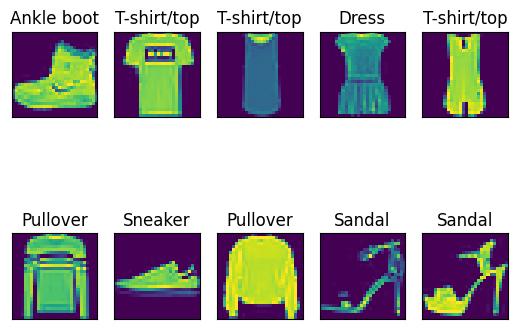

In [100]:
show_images(features_test, 2, 5, get_fashion_mnist_label(labels_test))

In [101]:
import sys

In [102]:
def get_dataloader_workers(num_workers=4):
 # 0 means no additional process is used to speed up the reading of data.
    if sys.platform.startswith('win'):
        return 0
    else:
        return num_workers

In [103]:
from torch.utils.data import DataLoader

In [104]:
batch_size = 256
train_iter = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers(4))
test_iter = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers(4))

In [105]:
import time

start = time.time()
for X, y in train_iter:
    continue
'%.2f sec' % (time.time() - start)

'3.35 sec'

In [107]:
def load_data_fashion_mnist(batch_size):
    dataset = torchvision.datasets.FashionMNIST
    trans = torchvision.transforms.ToTensor()
    mnist_train = torchvision.datasets.FashionMNIST(root='FashionMNIST/raw/train-images-idx3-ubyte', train=True, transform=trans)
    mnist_test = torchvision.datasets.FashionMNIST(root='FashionMNIST/raw/t10k-images-idx3-ubyte', train=False, transform=trans)

    return (DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers(4)),
            DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers(4)))


In [112]:
train_iter, test_iter = load_data_fashion_mnist(32)
for X, y in train_iter:
    print(get_fashion_mnist_label(y))
    break

['Bag', 'Bag', 'Ankle boot', 'Coat', 'Sneaker', 'Sandal', 'Dress', 'Bag', 'Pullover', 'Dress', 'Ankle boot', 'Bag', 'Pullover', 'Dress', 'Coat', 'Coat', 'Bag', 'Bag', 'Coat', 'Shirt', 'Sandal', 'Coat', 'Shirt', 'Trouser', 'Bag', 'Shirt', 'Coat', 'Bag', 'Dress', 'Bag', 'Coat', 'Dress']
